## Lecture-04

1. Data 
+ Pre-processing 
+ Feature-Extractor
+ Split Training, Test, Validation
+ Build Model
+ Gradient Descent 
+ Evaluation
+ Predicat
+ Analysis

## House Price Regression

### Load Data

In [1]:
from sklearn.datasets import load_boston

In [2]:
## ususlly will load in csv

In [3]:
data = load_boston()

In [4]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
import pandas as pd

In [6]:
dataframe = pd.DataFrame(data['data'])

In [7]:
dataframe.columns = data['feature_names']

In [8]:
dataframe[dataframe['CHAS'] == 1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
142,3.32105,0.0,19.58,1.0,0.8710,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82
152,1.12658,0.0,19.58,1.0,0.8710,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12
154,1.41385,0.0,19.58,1.0,0.8710,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12
155,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
160,1.27346,0.0,19.58,1.0,0.6050,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32
208,0.13587,0.0,10.59,1.0,0.4890,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66
209,0.43571,0.0,10.59,1.0,0.4890,5.344,100.0,3.8750,4.0,277.0,18.6,396.90,23.09
210,0.17446,0.0,10.59,1.0,0.4890,5.960,92.1,3.8771,4.0,277.0,18.6,393.25,17.27


### Pre-processing

In [9]:
dataframe.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
dtype: float64

In [10]:
dataframe['CHAS'] = dataframe['CHAS'].astype('int')
dataframe['CHAS'] = dataframe['CHAS'].astype('category')

In [11]:
dataframe['RAD'] = dataframe['RAD'].astype('int')
dataframe['RAD'] = dataframe['RAD'].astype('category')

In [12]:
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [13]:
dataframe['RAD']

0      1
1      2
2      2
3      3
4      3
      ..
501    1
502    1
503    1
504    1
505    1
Name: RAD, Length: 506, dtype: category
Categories (9, int64): [1, 2, 3, 4, ..., 6, 7, 8, 24]

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
onehoter = OneHotEncoder()
chas_and_rad_vec = onehoter.fit_transform(dataframe[['CHAS', 'RAD']])

### Standarlize

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
stander = StandardScaler()

In [18]:
dataframe.shape

(506, 13)

In [19]:
real_vec = stander.fit_transform(dataframe.drop(columns=['CHAS', 'RAD']))

In [20]:
chas_and_rad_vec[0].toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [21]:
import numpy as np

In [22]:
np.mean(real_vec, axis=0)

array([-1.12338772e-16,  7.89881994e-17,  2.10635198e-16, -1.96592852e-16,
       -1.08828186e-16, -1.47444639e-16, -8.42540793e-17,  0.00000000e+00,
       -4.21270397e-16, -7.44244367e-16, -3.08931624e-16])

In [23]:
np.std(real_vec, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
real_vec.shape

(506, 11)

In [25]:
chas_and_rad_vec.shape

(506, 11)

### Feature-Extractor

In [26]:
X = np.concatenate((real_vec, chas_and_rad_vec.toarray()), axis=1)

In [27]:
y = data['target']

### Split Training, Test, Validation

In [28]:
def split_train_val_test(X, y, test_ratio=0.2, val_ratio=0.2):
    indices = np.random.choice(range(len(X)), size=len(X), replace=False)
    
    train_indices = indices[:int(len(X)*(1-test_ratio)*(1-val_ratio))]
    val_indices = indices[int(len(X)*(1-test_ratio)*(1-val_ratio)): int(len(X)*(1-test_ratio))]
    test_indices = indices[int(len(X)*(1-test_ratio)):]
    
    return (X[train_indices], y[train_indices]), (X[val_indices], y[val_indices]), (X[test_indices], y[test_indices])    

In [29]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = split_train_val_test(X, y)

#### sklearn.model_selection.train_test_split also could be used

### Build-Model

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
regression = LinearRegression()

In [32]:
regression.fit(X_train, y_train)

LinearRegression()

## Question: If overfittiing or underfitting? 

### Explain: Why validation set is more useful in deep learning

### Gradient Descent

### Evaluation

In [33]:
regression.score(X_train, y_train)

0.7618048591211586

In [34]:
regression.score(X_val, y_val)

0.6220344156313734

In [35]:
regression.score(X_test, y_test)

0.7520238795736509

## Interpreter

In [36]:
regression.coef_

array([-1.02126285e+00,  1.11009359e+00,  2.79158493e-01, -2.12087890e+00,
        3.18072108e+00, -1.45058575e-01, -3.12908485e+00, -2.06568346e+00,
       -2.08069035e+00,  8.18259843e-01, -2.79732185e+00, -2.90268211e-01,
        2.90268211e-01, -3.92549192e+00, -2.88358612e+00,  1.45743767e+00,
       -6.08827443e-01, -3.54743378e-03, -2.31850546e+00,  1.67762247e+00,
        1.70391991e+00,  4.90097834e+00])

In [37]:
regression.intercept_

21.703892701745453

### Predict

In [38]:
X_test[0]

array([-0.41278791, -0.48772236, -1.03402724, -0.38609067,  0.81969961,
        0.20714385, -0.41820252, -0.66660821, -0.85792914,  0.3793226 ,
       -0.80362516,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

In [39]:
regression.predict([X_test[0]])

array([31.42666677])

In [40]:
import matplotlib.pyplot as plt

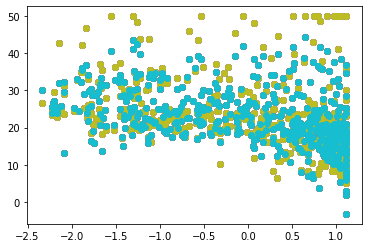

In [41]:
for i in range(5):
    plt.scatter(X[:, 5], y)
    plt.scatter(X[:, 5], regression.predict(X))

In [42]:
import matplotlib

In [43]:
matplotlib.colors

<module 'matplotlib.colors' from 'd:\\common_software\\anaconda3.6\\envs\\week3\\lib\\site-packages\\matplotlib\\colors.py'>

In [44]:
%matplotlib inline

In [45]:
def show_predication_result(x, target):
    width = 3

    fig, ax = plt.subplots(x.shape[1]//width + 1, width, figsize=(40, 40))

    for i in range(x.shape[1]):
        ix = np.unravel_index(i, ax.shape)
        plt.sca(ax[ix])
        ax[ix].title.set_text('Feature-{}'.format(i))
        plt.scatter(x[:, i], target)
        plt.scatter(x[:, i], regression.predict(x))

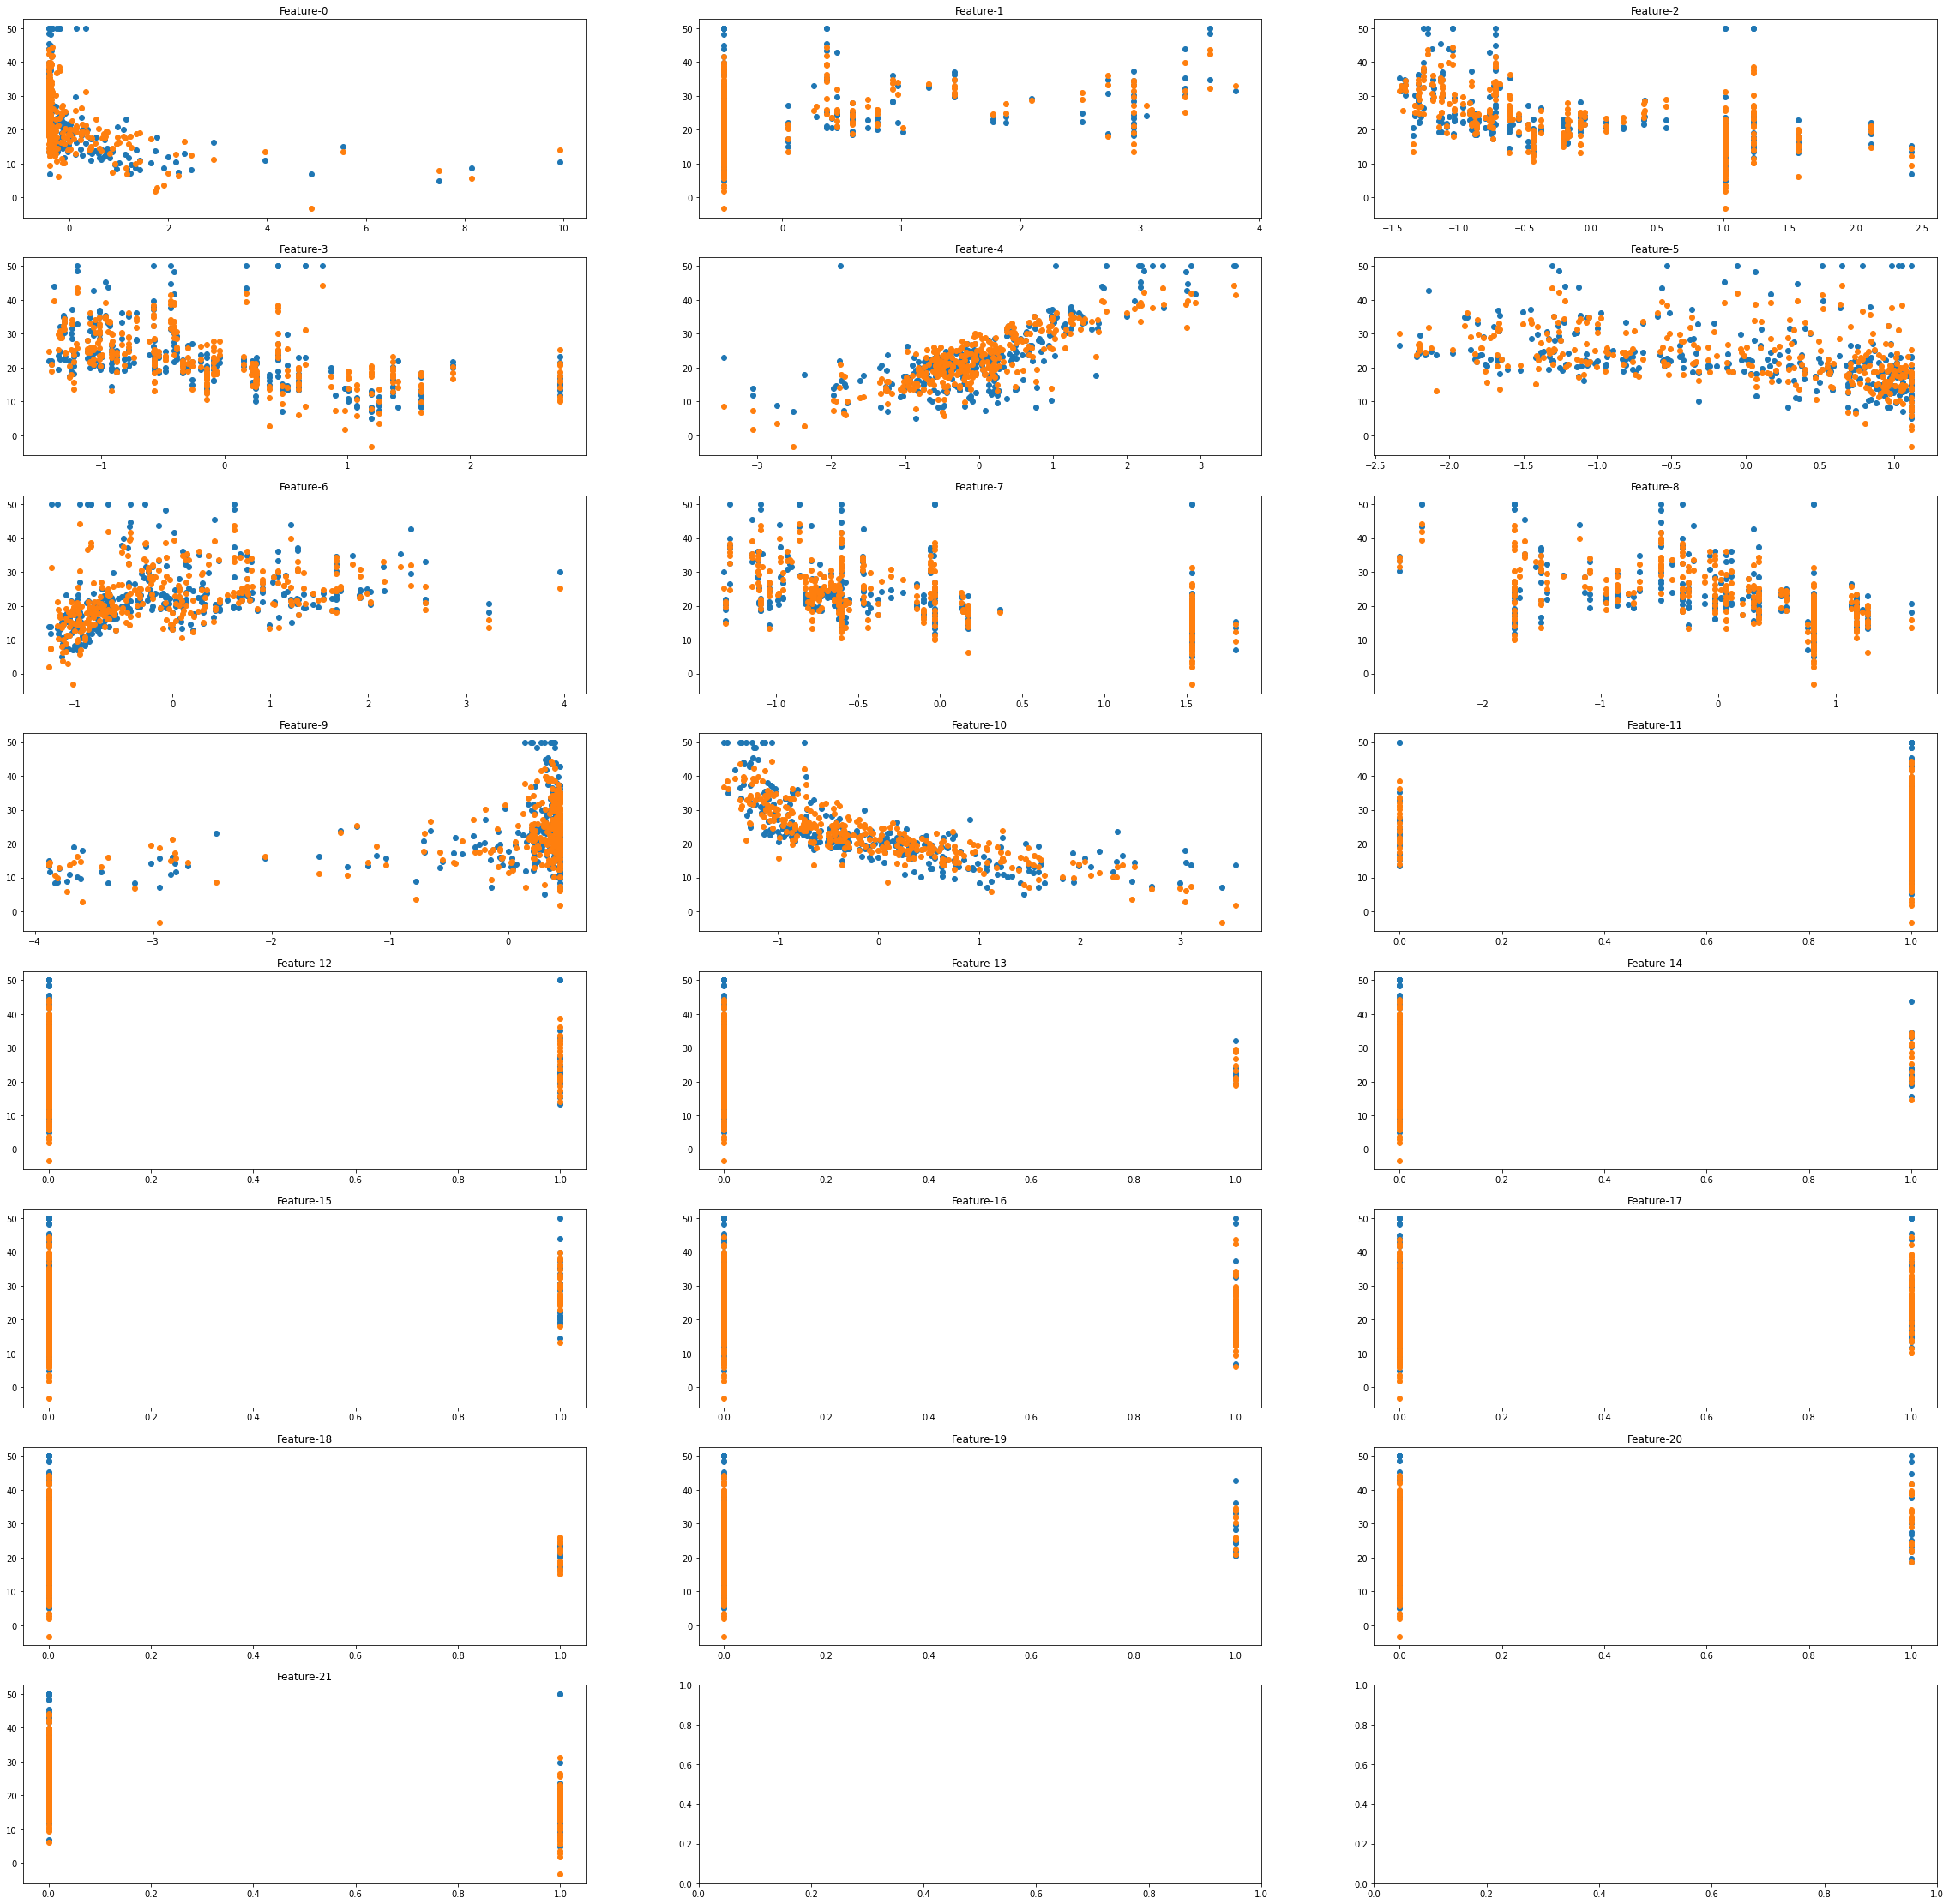

In [46]:
show_predication_result(X_train, y_train)

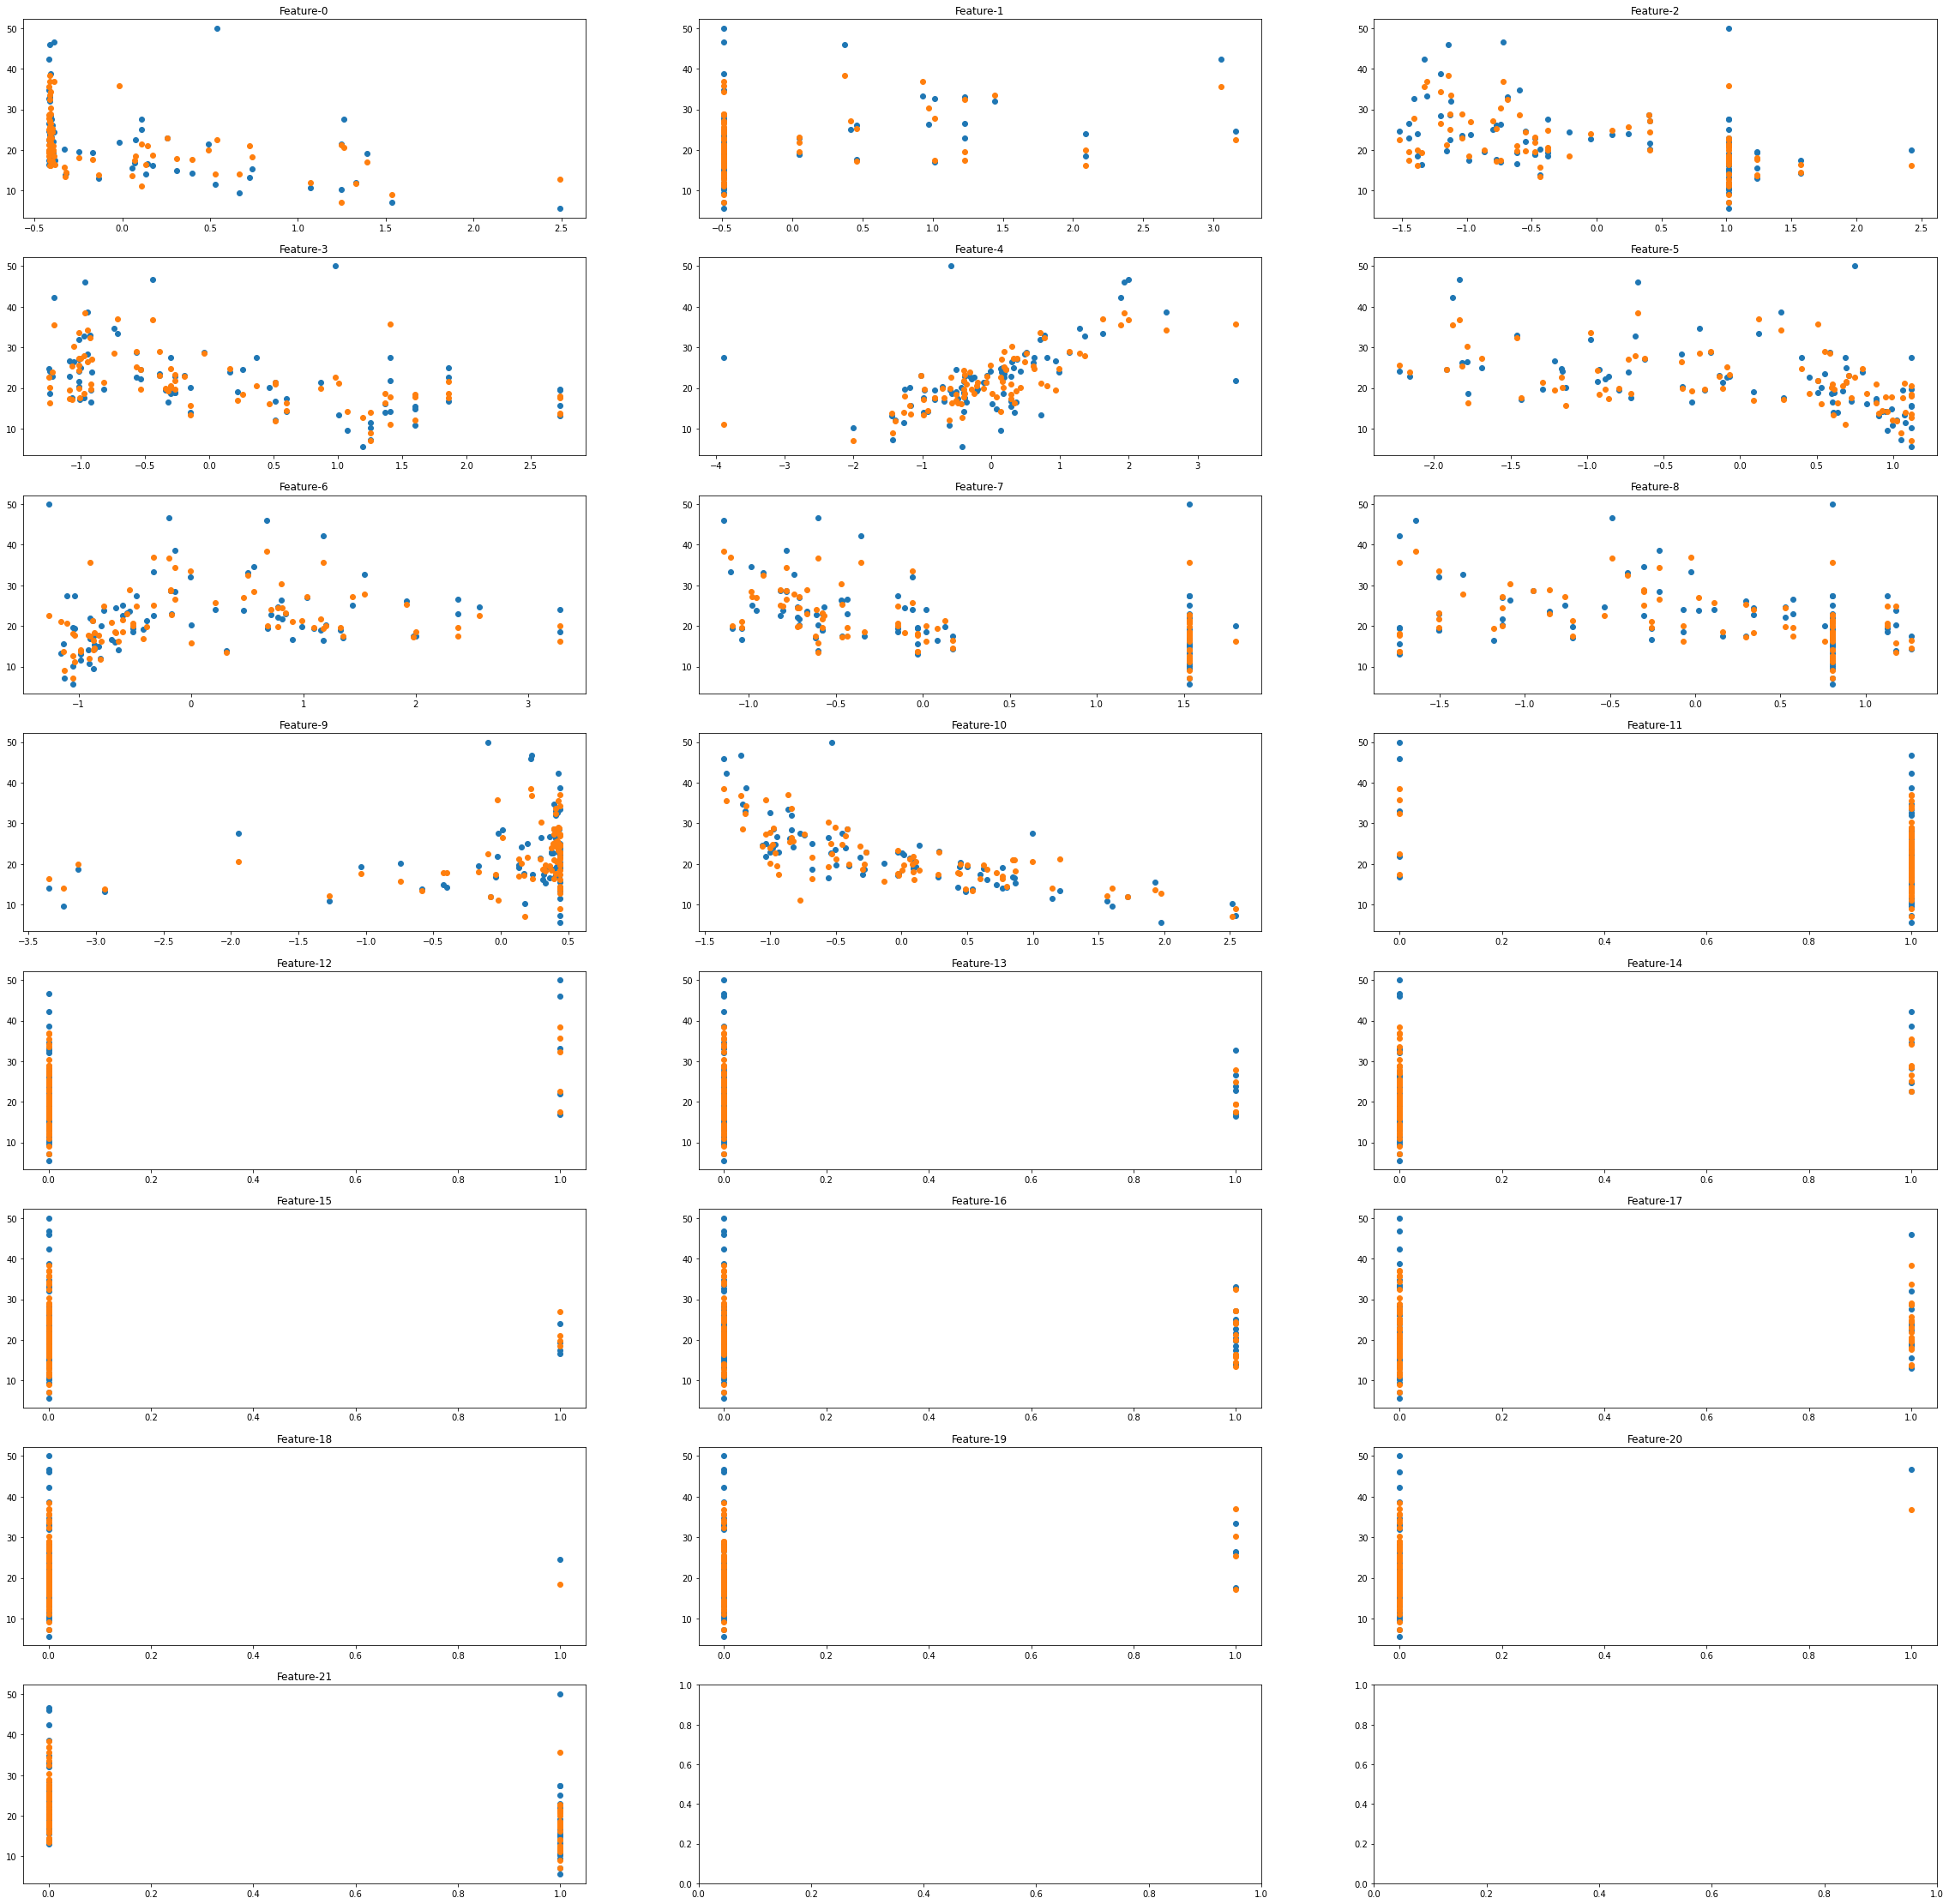

In [47]:
show_predication_result(X_val, y_val)

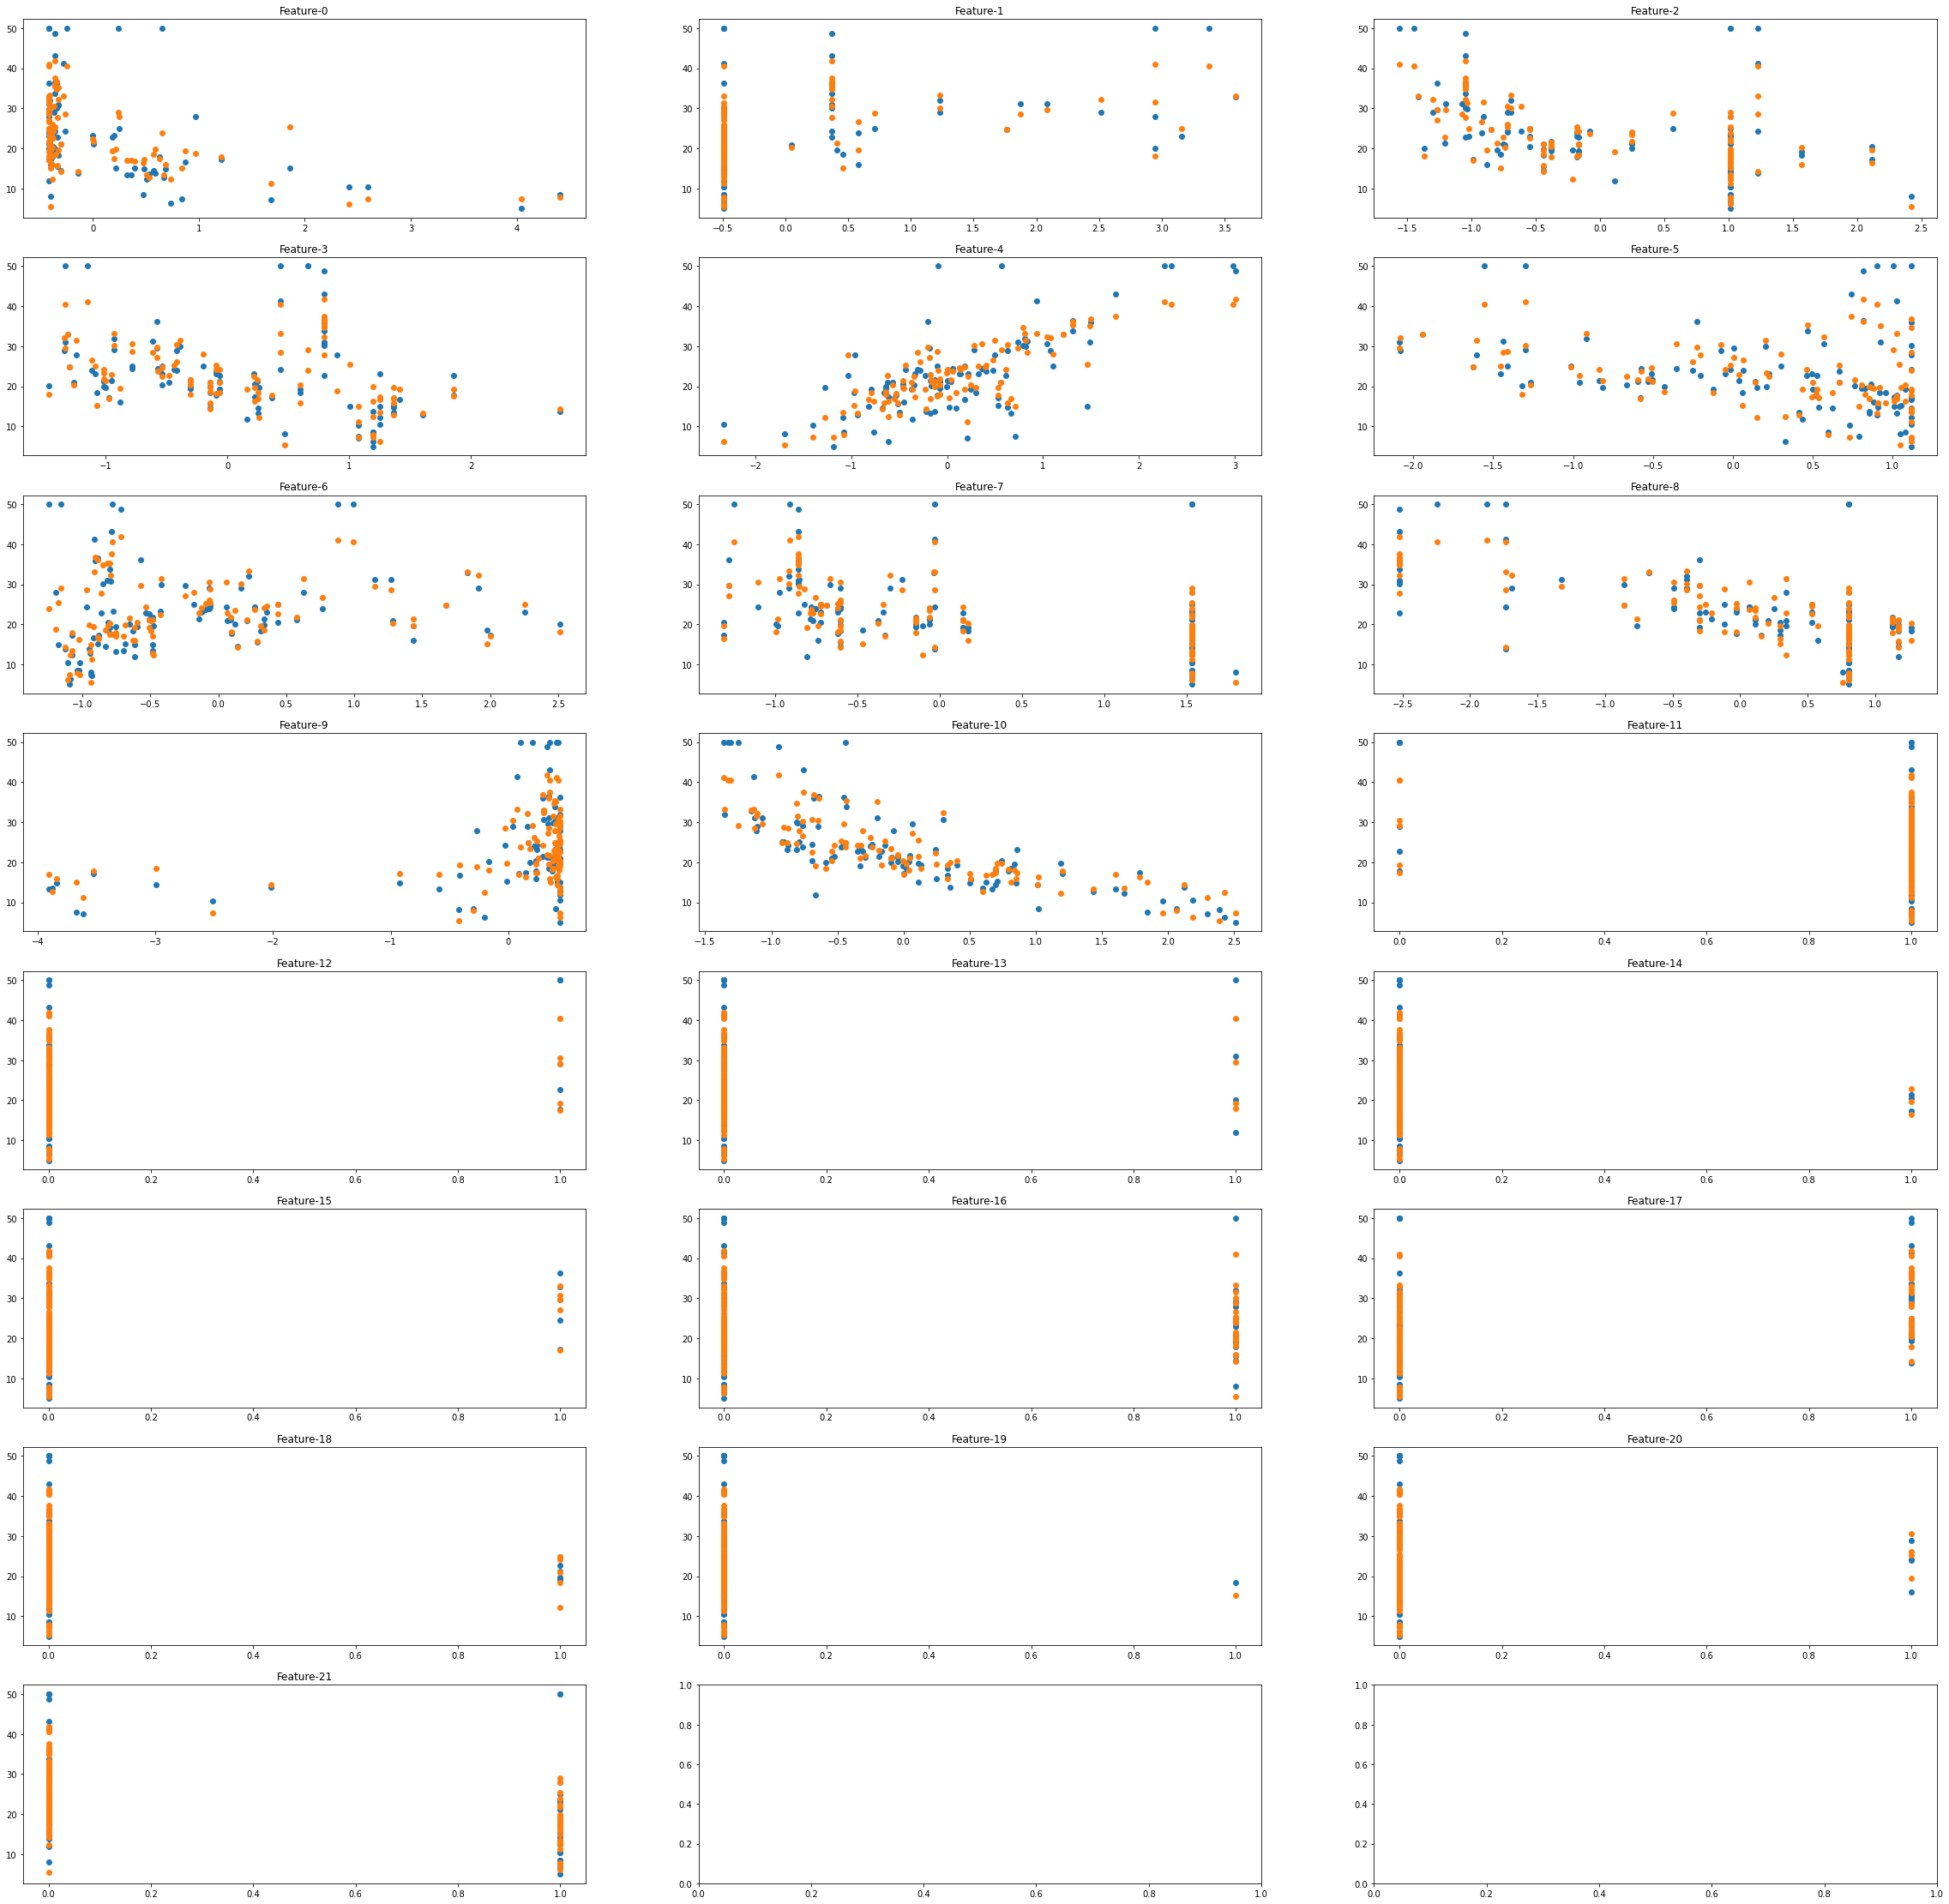

In [48]:
show_predication_result(X_test, y_test)

## Outlinear （异常值）

##  Part-02 Logstic Regression

1. Data 
+ Pre-processing 
+ Feature-Extractor
+ Split Training, Test, Validation
+ Build Model
+ Gradient Descent 
+ Evaluation
+ Predicat
+ Analysis

### Pre-processing 

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
from struct import unpack

In [51]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [52]:
train_x, train_y = loadmnist('dataset/t10k-images-idx3-ubyte', 'dataset/t10k-labels-idx1-ubyte')

In [53]:
test_x, test_y = loadmnist('dataset/train-images-idx3-ubyte', 'dataset/train-labels-idx1-ubyte')

In [54]:
train_x.shape

(10000, 784)

In [55]:
test_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [56]:
test_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

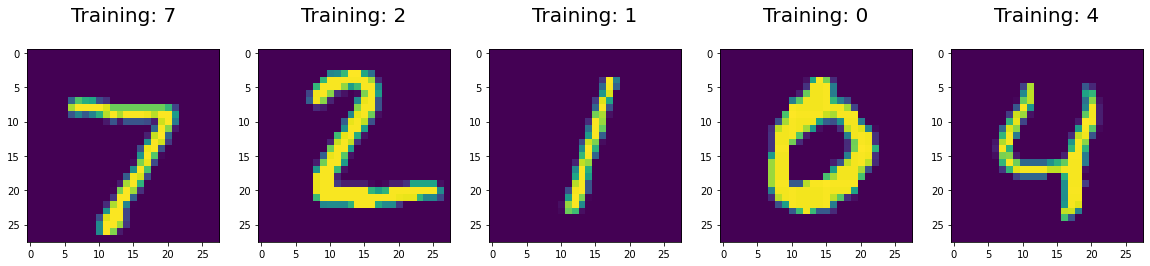

In [57]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_x[0:5], train_y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)))
    plt.title('Training: %i\n' % label, fontsize = 20)

## we only choose label with 0 and 6

In [58]:
zero_train_indices = np.where(train_y == 0)
one_train_indices = np.where(train_y == 6)
train_indices = np.concatenate((zero_train_indices[0], one_train_indices[0]))

zero_test_indices = np.where(test_y == 0)
one_test_indices = np.where(test_y == 6)
test_indices = np.concatenate((zero_test_indices[0], one_test_indices[0]))

In [59]:
train_indices = np.random.choice(train_indices, size=len(train_indices), replace=False)
test_indices = np.random.choice(test_indices, size=len(test_indices), replace=False)

In [60]:
val_ratio = 0.2

train_indices = train_indices[: int(len(train_indices) * (1 - val_ratio))]
val_indices = train_indices[int(len(train_indices) * (1 - val_ratio)):]

In [61]:
binary_x_train = train_x[train_indices]
binary_x_test = test_x[test_indices]
binary_x_val = train_x[val_indices]

binary_y_val = train_y[val_indices]
binary_y_train = train_y[train_indices]
binary_y_test = test_y[test_indices]

In [62]:
import random

In [63]:
binary_y_train

array([0, 0, 0, ..., 6, 0, 6], dtype=uint8)

Text(0.5, 1.0, 'Training: 0\n')

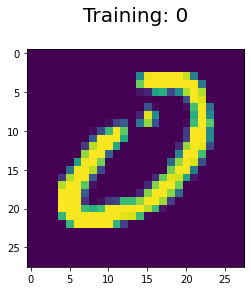

In [64]:
plt.imshow(np.reshape(binary_x_train[1], (28,28)))
plt.title('Training: %i\n' % binary_y_train[1], fontsize = 20)

In [65]:
from collections import Counter

In [66]:
Counter(binary_y_train)

Counter({0: 793, 6: 757})

In [67]:
Counter(binary_y_test)

Counter({6: 5918, 0: 5923})

In [68]:
Counter(binary_y_val)

Counter({6: 145, 0: 165})

## Build Model

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
clf = LogisticRegression(random_state=0, solver='lbfgs')
# L-BFGS-B – Software for Large-scale Bound-constrained Optimization

In [71]:
clf.fit(binary_x_train, binary_y_train)

d:\common_software\anaconda3.6\envs\week3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [72]:
clf.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -6.24274533e-08, -6.46892912e-08,  7.20992375e-07,
         2.69658859e-04,  8.65199213e-06,  1.33702202e-05,
         8.75569250e-06,  5.00757977e-06,  3.19912326e-06,
         8.04266669e-06,  2.31984529e-06,  5.82681819e-07,
         7.99737323e-08,  0.00000000e+00,  0.00000000e+0

In [73]:
clf.intercept_

array([0.00019494])

In [74]:
#??clf.score

In [75]:
clf.score(binary_x_train, binary_y_train)

1.0

In [76]:
clf.score(binary_x_val, binary_y_val)

1.0

In [77]:
binary_x_test.shape

(11841, 784)

In [78]:
binary_y_test.shape

(11841,)

In [79]:
clf.score(binary_x_test, binary_y_test)

0.9889367452073304

In [80]:
predicated_result = clf.predict(binary_x_test)

In [81]:
np.where(binary_y_test != predicated_result)

(array([  122,   269,   372,   376,   533,   549,   652,   824,   877,
          907,   924,   931,   982,  1366,  1622,  1669,  1790,  1953,
         2271,  2305,  2311,  2348,  2381,  2383,  2445,  2595,  2636,
         2660,  2716,  3000,  3097,  3138,  3266,  3353,  3566,  3581,
         3867,  4338,  4445,  4469,  4482,  4666,  4688,  4845,  4891,
         4978,  5089,  5093,  5118,  5144,  5203,  5345,  5527,  5561,
         5643,  5710,  5738,  5848,  5864,  5990,  6019,  6048,  6167,
         6185,  6251,  6440,  6639,  6643,  6687,  6888,  6931,  7135,
         7153,  7234,  7267,  7864,  7955,  7977,  8099,  8122,  8131,
         8153,  8252,  8280,  8321,  8376,  8577,  8586,  8592,  8623,
         8680,  8912,  8938,  9102,  9138,  9261,  9340,  9415,  9620,
         9626,  9653,  9676,  9689,  9960, 10091, 10123, 10249, 10303,
        10337, 10361, 10398, 10449, 10461, 10500, 10700, 10805, 10960,
        10989, 10996, 11014, 11149, 11280, 11287, 11302, 11304, 11328,
      

Text(0.5, 1.0, 'Actual Value: 0 ; Predict Value: 0 \n')

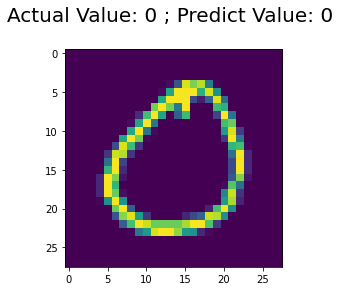

In [82]:
lookup_index = 1184

plt.imshow(np.reshape(binary_x_test[lookup_index], (28,28)))
plt.title('Actual Value: {} ; Predict Value: {} \n'.format(binary_y_test[lookup_index], predicated_result[lookup_index]), fontsize = 20)

In [83]:
from sklearn import metrics

In [84]:
binary_y_test[0]

6

In [85]:
predicated_result[0]

6

In [86]:
metrics.precision_score(binary_y_test, predicated_result, average='macro')

0.9889393704765275

In [87]:
metrics.precision_score(binary_y_test, predicated_result, pos_label=6)

0.9876959379740435

In [88]:
metrics.recall_score(binary_y_test, predicated_result, pos_label=6)

0.9901993916863805

In [89]:
fpr, tpr, threshold = metrics.roc_curve(binary_y_test, predicated_result, pos_label=6)

In [90]:
metrics.auc(fpr, tpr)

0.988937278149454

In [91]:
cm = metrics.confusion_matrix(binary_y_test, predicated_result)

In [92]:
import seaborn as sn

In [93]:
??sns.heatmap

Object `sns.heatmap` not found.


In [94]:
from sklearn.metrics import confusion_matrix

data = confusion_matrix(binary_y_test, predicated_result)

In [95]:
data

array([[5850,   73],
       [  58, 5860]], dtype=int64)

In [96]:
df_cm = pd.DataFrame(data, columns=np.unique(binary_y_test), index = np.unique(binary_y_test))

# 
# 
# plt.figure(figsize = (10,7))
# sn.set(font_scale=1.4)#for label size
# sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [97]:
df_cm.index.name = 'Actual'

In [98]:
df_cm.columns.name = 'Predicted'

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

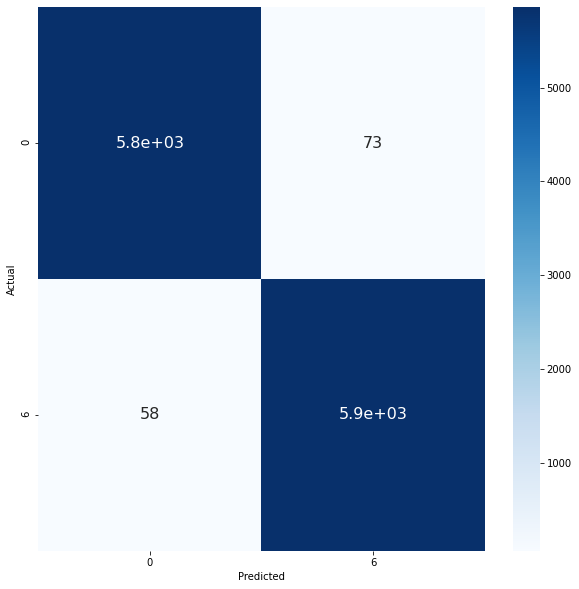

In [99]:
plt.figure(figsize=(10, 10))
sn.heatmap(df_cm, cmap='Blues', annot=True, annot_kws={"size": 16})